# Проектная работа: Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
1. лог сервера с данными об их посещениях (файл `/datasets/visits_info_short.csv`)
2. выгрузка их покупок за этот период (файл `/datasets/orders_info_short.csv`)
3. рекламные расходы (файл `/datasets/costs_info_short.csv`)

__Цель проекта:__  

Основываясь на данных провести анализ данных и ответить на следующие вопросы:
1. Откуда приходят пользователи и какими устройствами они пользуются.
2. Сколько стоит привлечение пользователей из различных рекламных каналов.
3. Сколько денег приносит каждый клиент.
4. Когда расходы на привлечение клиента окупаются.
5. Какие факторы мешают привлечению клиентов.

# Описание даных

__Структура `visits_info_short.csv`:__ 

`User Id` — уникальный идентификатор пользователя,  
`Region` — страна пользователя,  
`Device` — тип устройства пользователя,  
`Channel` — идентификатор источника перехода,  
`Session Start` — дата и время начала сессии,  
`Session End` — дата и время окончания сессии.  

__Структура `orders_info_short.csv`:__

`User Id` — уникальный идентификатор пользователя,  
`Event Dt` — дата и время покупки,  
`Revenue` — сумма заказа.  

__Структура `costs_info_short.csv`:__

`dt` — дата проведения рекламной кампании,  
`Channel` — идентификатор рекламного источника,  
`costs` — расходы на эту кампанию.  

__Ход исследования:__

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Анализ маркетинговых расходов.
5. Оценка окупаемости рекламы.
6. Общий вывод.

## Обзор данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings(action='ignore')

### Чтение файлов в данными

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')    

### Обзор таблицы `visits`

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


### Обзор таблицы `orders`

In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


### Обзор таблицы `costs`

In [5]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Вывод по ознакомлению с таблицами
1. Во всех таблицах отсутсвуют пропуски.
2. Необходимо привести все названия столбцов в таблицах к единому стилю.
3. Некоторые столбцы имеют неверный тип данных (столбцы с датой имеют тип данных object, вместо datetime).

## Предобработка данных

### Обработка стиля названяи столбцов

In [6]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')


In [7]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')


In [8]:
costs.columns = costs.columns.str.lower()


### Обработка типов данных

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [10]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [11]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Проверка на наличие пропусков

In [12]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


### Вывод по предобработке
1. Названия столбцов были приведены к единому стилю.
2. Были изменены типы данных на корректные.
3. В таблицах нет ни одного пропуска.

## Исследовательский анализ данных

### Составление профилей пользователей

Для того чтобы создать профили пользователей необходимо воспользоваться функцией `get_profiles`. Определим минимальную и максимальную даты привлечения пользователей.

In [13]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']).
        groupby('user_id').
        agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        ).
        rename(columns={'session_start': 'first_ts'}).
        reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel']).
        agg({'user_id': 'nunique'}).
        rename(columns={'user_id': 'unique_users'}).
        reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Согласно заданию проекта необходимо провести анализ по состоянию на 1 ноября 2019 года. Так как выгрузка содержить данные по 27 октября 2019 года возьмем её. Также в задании проекта в бизнес-плане заложено что пользователи должны окупать не позднее чем через 2 недели после привлечения. 

In [15]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max() 
print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')


Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Минимальная дата привлечения пользователей - 1 мая 2019 года, максимальная - 27 октября 2019 года.

### Анализ пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [16]:
region =  (profiles.
            pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count').
            rename(columns={True: 'payer', False: 'not_payer'}).
            sort_values(by='payer', ascending=False)
)

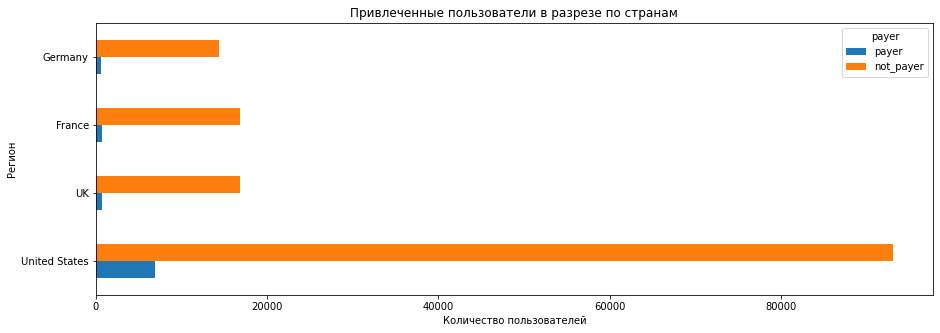

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
region[['payer', 'not_payer']].plot(kind='barh', ax=ax)


ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Регион')
ax.set_title('Привлеченные пользователи в разрезе по странам')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

Больше всего не платящих пользователей из США, меньше всего из Германии. Точно так же расположились регионы и количестве платящих пользователей. С точки зрения доли платящих опльзователей лидирует так же США, но в отличии от общего количества пользователей и платящих из них Германия идет после США обходя Францию и Великобританию.

### Анализ устройств

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [18]:
device =  (profiles.
            pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count').
            rename(columns={True: 'payer', False: 'not_payer'}).
            sort_values(by='payer', ascending=False)
)

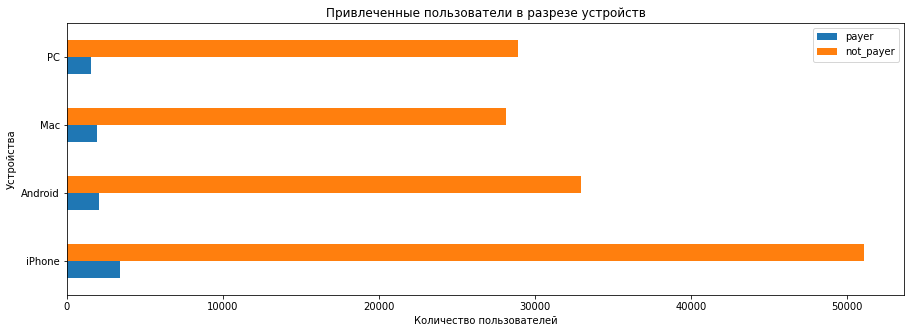

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
device[['payer', 'not_payer']].plot(kind='barh', ax=ax)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Устройства')
ax.set_title('Привлеченные пользователи в разрезе устройств')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

Больше всего как платящих, так и не платящих пользователей пользуются iPhone. В то время как меньше всего не платящих пользователей пользуются Mac, а платящих - PC. Лучшую конверсию 3имеют пользователи использующие продукцию Apple (iPhone и Mac).

### Анализ каналов привлечения

Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [20]:
channel =  (profiles.
            pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count').
            rename(columns={True: 'payer', False: 'not_payer'})
          )

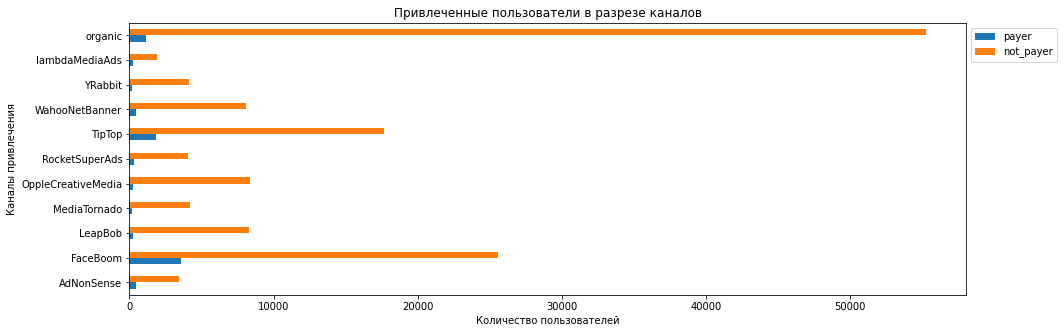

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
channel[['payer', 'not_payer']].plot(kind='barh', ax=ax)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Каналы привлечения')
ax.set_title('Привлеченные пользователи в разрезе каналов')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel.sort_values(by='payer_share', ascending=False)

Самый большой приток пользователей происходит через органические каналы. Каналы FaceBoom и TipTop показывают очень неплохие результаты. Также с точки зреняи конверсии хорошие показатели у AdNonSense и lambdaMediaAds.

### Вывод по исследовательскиому анализу
1. Больше всего не платящих пользователей из США, меньше всего из Германии. Точно так же расположились регионы и количестве платящих пользователей. С точки зрения доли платящих опльзователей лидирует так же США, но в отличии от общего количества пользователей и платящих из них Германия идет после США обходя Францию и Великобританию.
2. Больше всего как платящих, так и не платящих пользователей пользуются iPhone. В то время как меньше всего не платящих пользователей пользуются Mac, а платящих - PC. Лучшую конверсию 3имеют пользователи использующие продукцию Apple (iPhone и Mac).
3. Самый большой приток пользователей происходит через органические каналы. Каналы FaceBoom и TipTop показывают очень неплохие результаты. Также с точки зреняи конверсии хорошие показатели у AdNonSense и lambdaMediaAds.

## Маркетинг

### Расчет общей суммы затрат на маркетинг

In [22]:
f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}'

'Общая сумма затрат на рекламу: 105497.0'

### Расчет рекламных затрат по источника

In [23]:
costs_channel = costs.pivot_table(index='channel',values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
costs_channel['%'] = (100 * costs_channel/costs_channel.sum()).round(2)
costs_channel

,costs,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Самые большие расходы на рекламу у TipTop, самые низкие - YRabbit.

### Изменение расходов на рекламу

Text(0.5, 1.0, 'Динамика расходов по неделям')

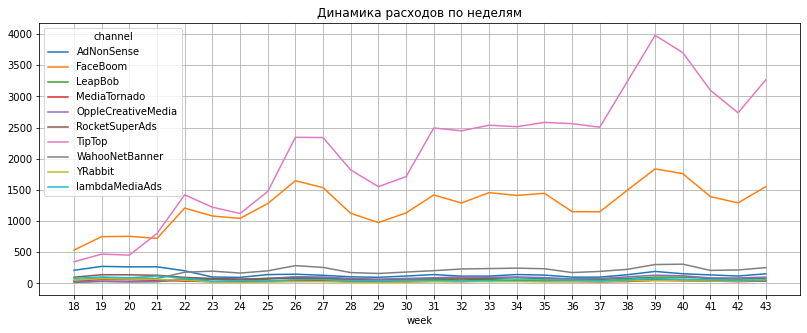

In [24]:
costs.dt = pd.to_datetime(costs.dt)
costs['week'] = costs.dt.dt.week
costs['month'] = costs.dt.dt.month

plt.figure(figsize=(30, 5))

report_week = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')

report_week.T.plot(grid=True, xticks=list(report_week.columns.values), ax=plt.subplot(1, 2, 1))
plt.title('Динамика расходов по неделям')

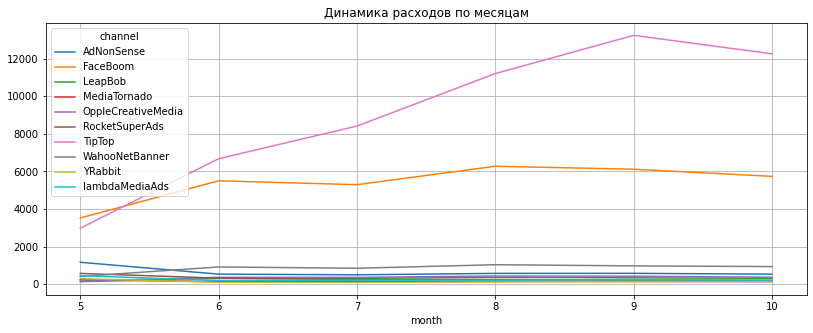

In [25]:
plt.figure(figsize=(30, 5))

report_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')

report_month.T.plot(grid=True, xticks=list(report_month.columns.values), ax=plt.subplot(1, 2, 1))
plt.title('Динамика расходов по месяцам')
plt.show()

Сильный рост расходов на рекламу замечен только на TipTop и FaceBoom. По остальным каналам в целом расходы на рекламу не увеличиваются.

### САС

Для начала почитаем средний САС на одного пользователя. В расчетах не будем использовать органический канал, потому что он ничего не стоил в плане рекламы.

In [26]:
cac = (profiles.
              query('channel != "organic"')[['user_id', 'acquisition_cost']].
              drop_duplicates().
              agg({'acquisition_cost': 'mean'})
              )
cac

acquisition_cost    1.127481
dtype: float64

Посчитаем САС для каждого источника по отдельности.

In [27]:
cac_channel = (profiles.
       pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean').
       query('channel != "organic"').
       sort_values(by='acquisition_cost', ascending=False).
       rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Дороже всего для компании обходится пользователь, которого привлекли с TipTop, дешевле всего - LeapBob.

### Вывод по маркетингу
1. Общая сумма затрат на рекламу - 105497.0.
2. Самые большие расходы на рекламу у TipTop, самые низкие - YRabbit.
3. Сильный рост расходов на рекламу замечен только на TipTop и FaceBoom. По остальным каналам в целом расходы на рекламу не увеличиваются.
4. Дороже всего для компании обходится пользователь, которого привлекли с TipTop, дешевле всего - LeapBob.

## Оценка окупаемости рекламы

In [28]:
analysis_horizon = 14  
observation_date = max_analysis_date - timedelta(days=analysis_horizon - 1) 

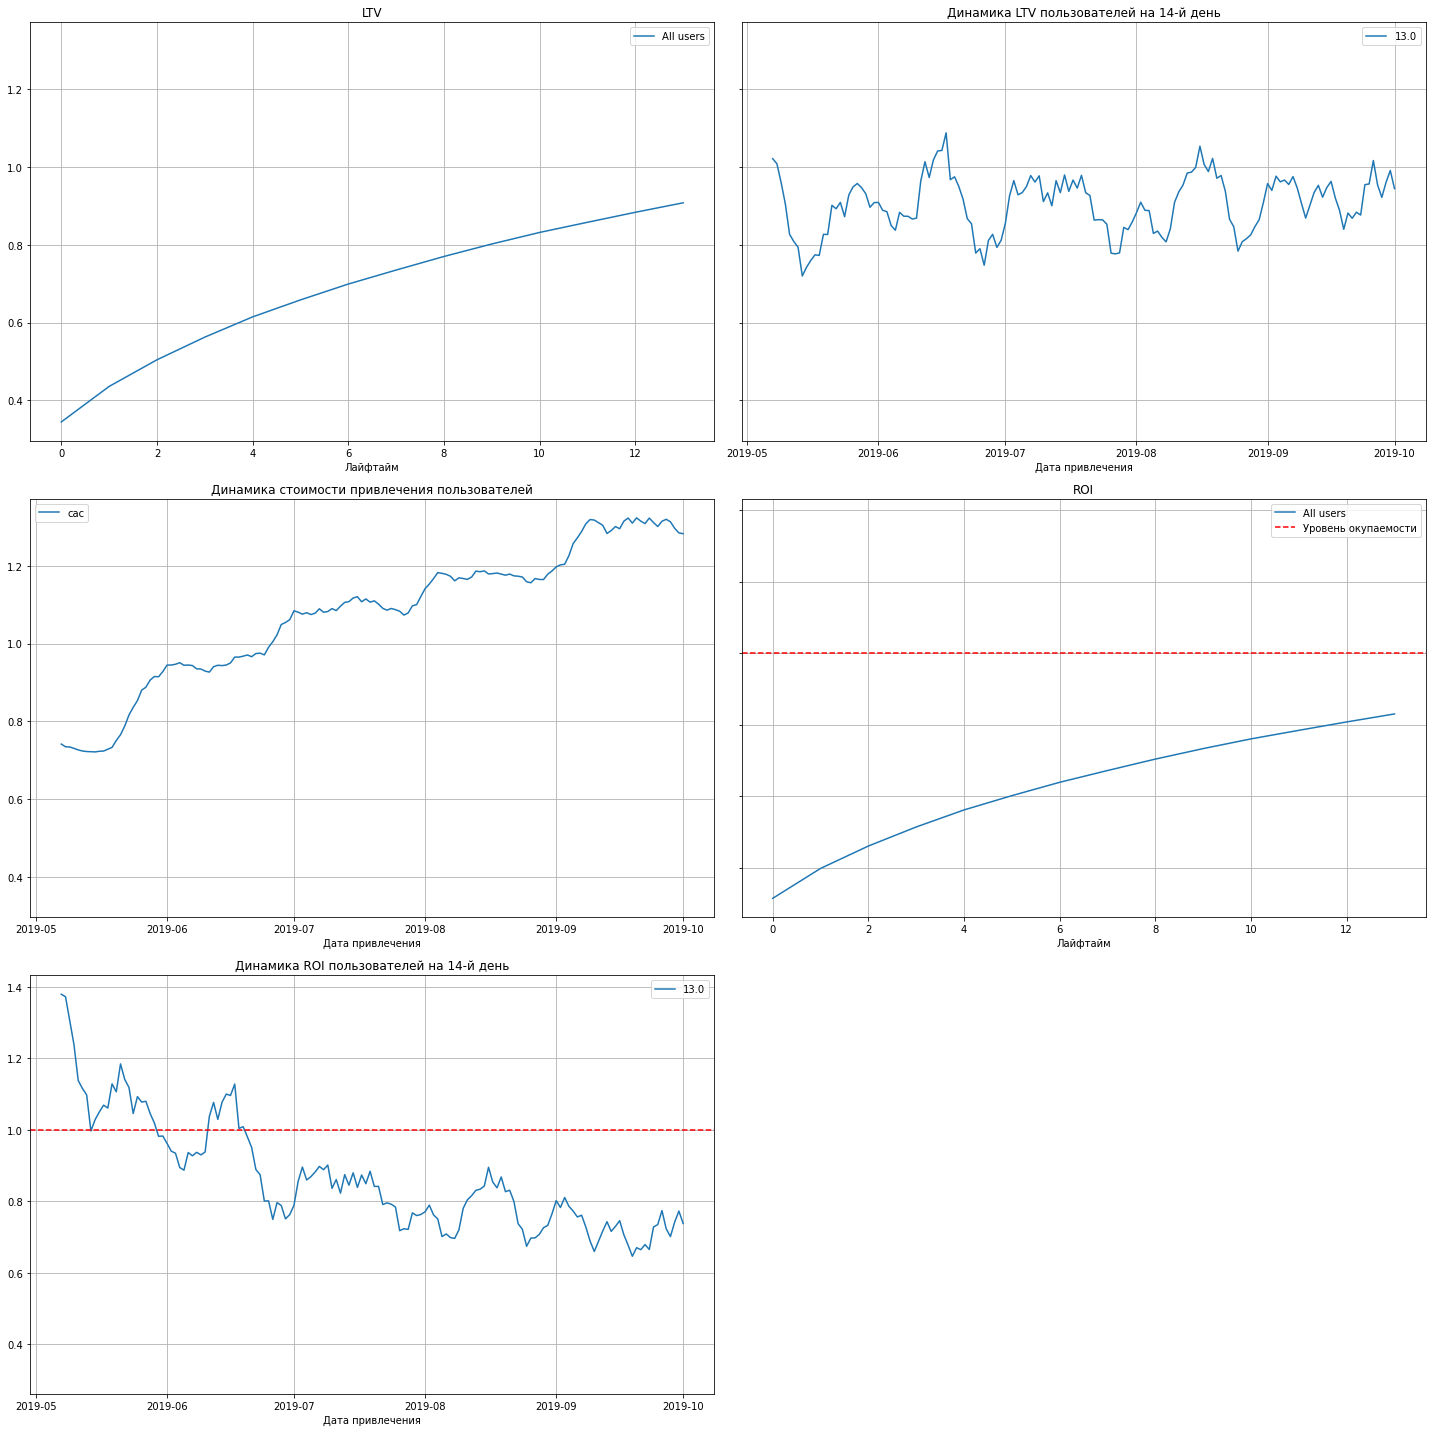

In [29]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 20))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
#исключаем из скоупа данных всех органических пользователей т.к. они приносят доход, но их привлечение компании ничего не стоило.
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

#### Вывод по окупаемости рекламы:
1. САС растет, значит бюджет на рекламы так же растет.
2. Реклама на 14 день и далее не окупается.
3. После мая 2019 года клиенты перестают окупаться.
4. График LTV достаточно стабильный.

### Окупаемость рекламы с разбивкой по устройствам

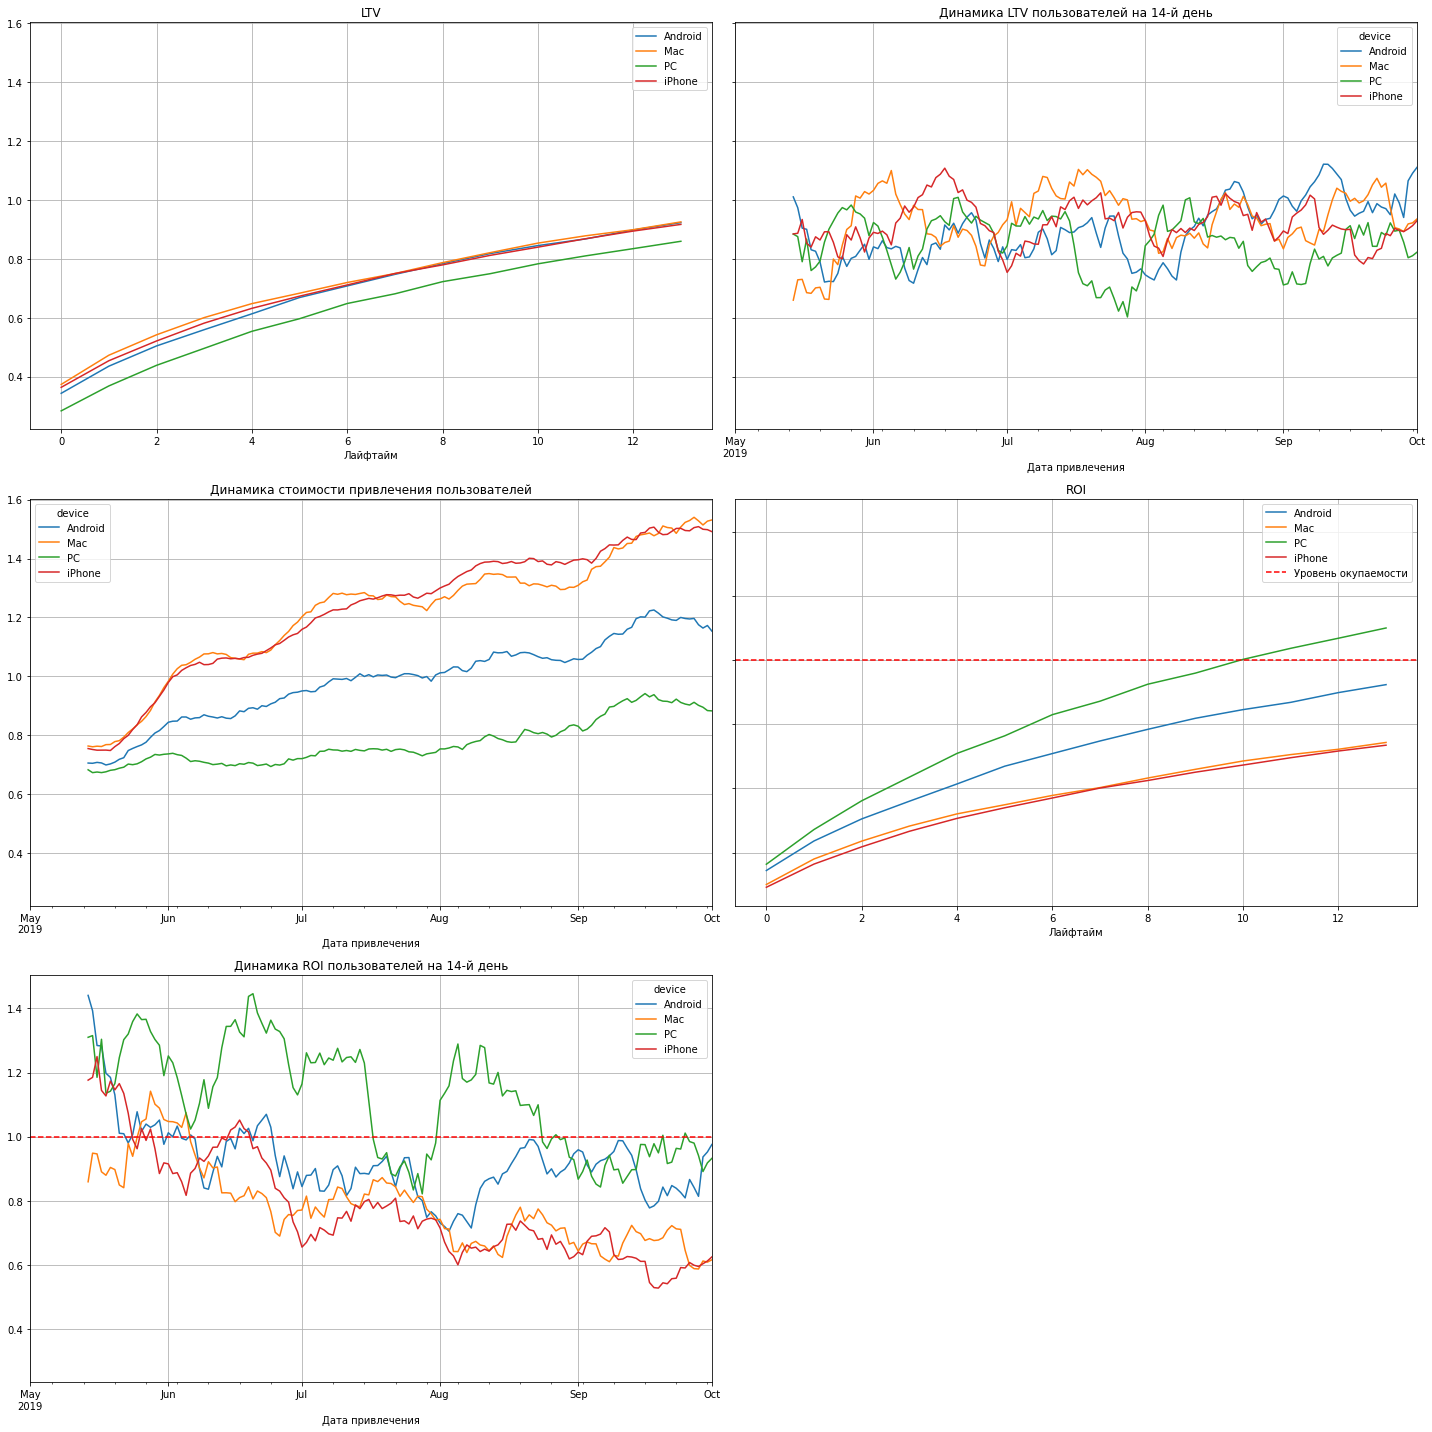

In [30]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

#### Вывод по окупаемости рекламы с разбивкой по устройствам
1. На устройствах Apple САС растет сильнее, чем на PC и Android.
2. Не смотря на то что больше всего клиентов приходят с платформ устройств Apple толку от них мало т.к. они не приносят прибыли.
2. После середины июня на 14 день продожают окупаться только клиенты с PC.

### Окупаемость рекламы с разбивкой по странам

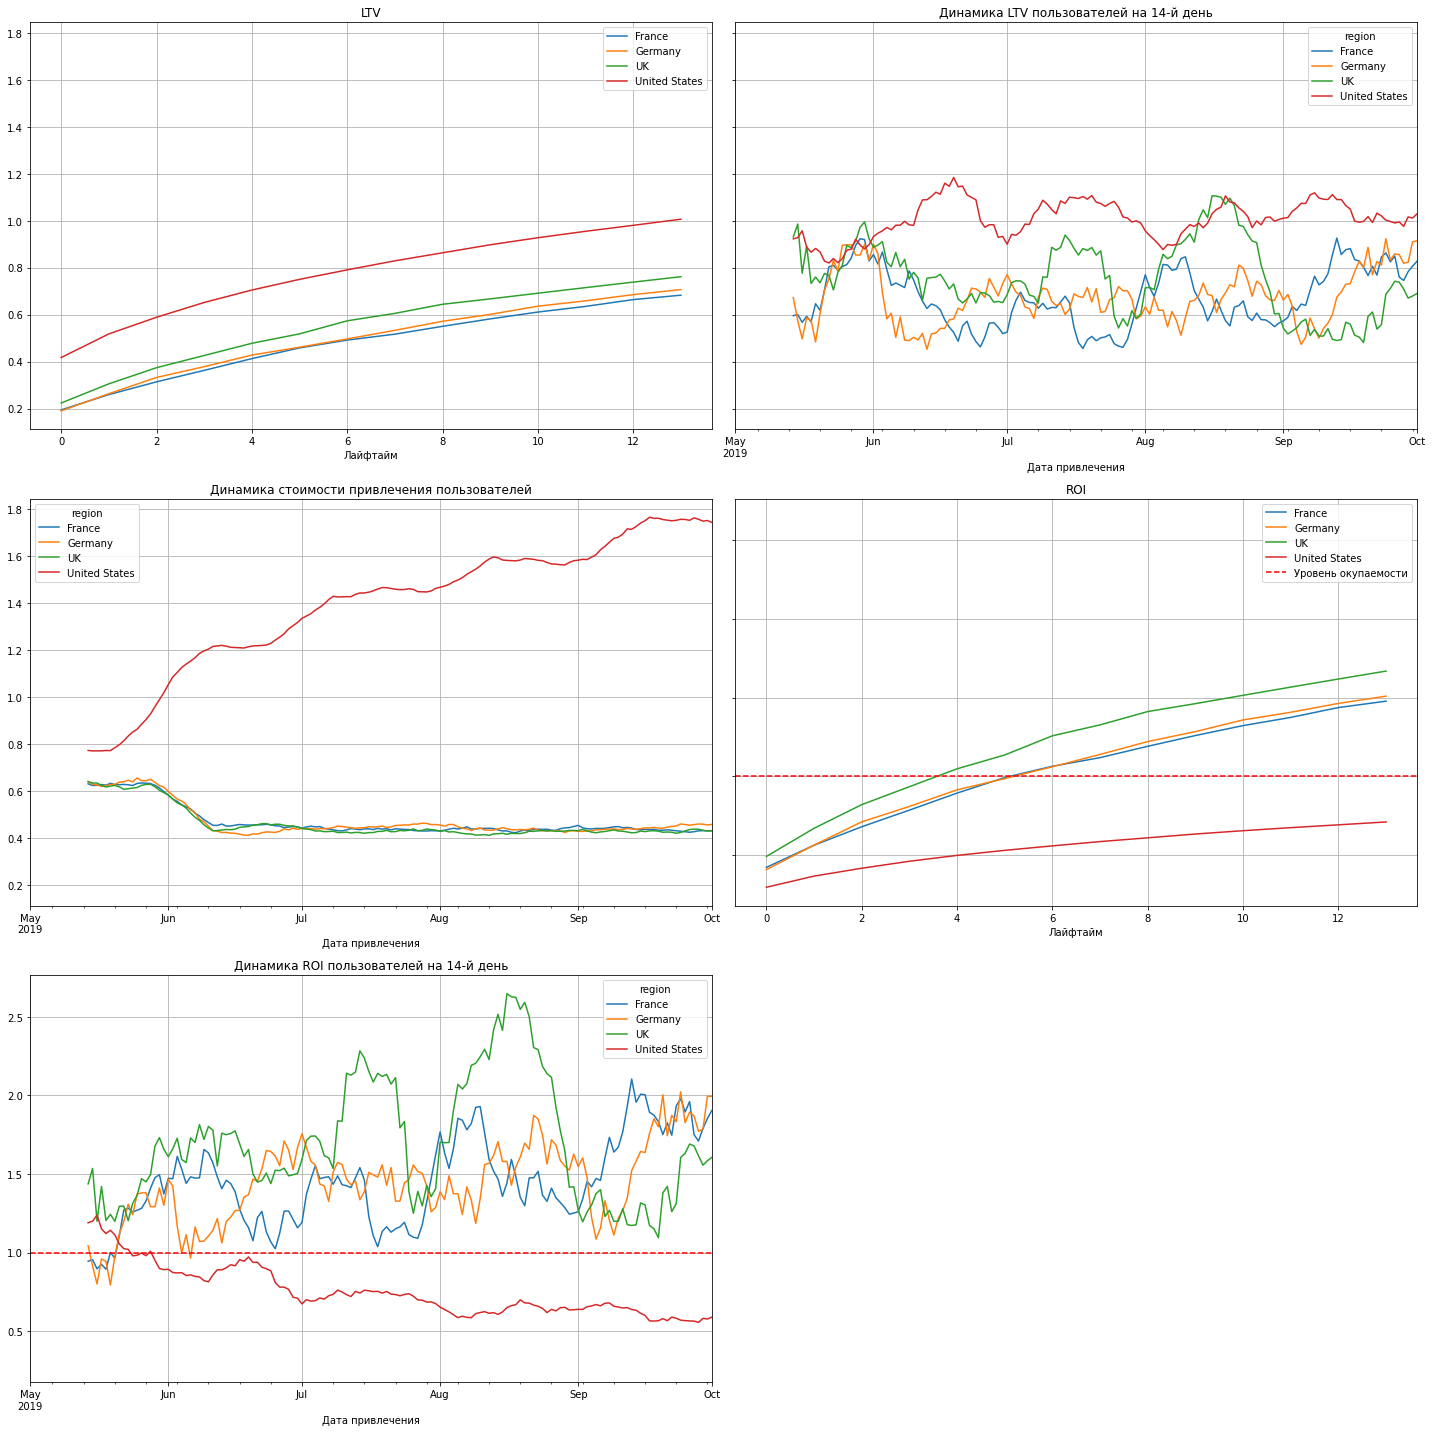

In [31]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

#### Вывод по окупаемости рекламы с разбивкой по странам
1. Не смотря на огромное количество клиентов пришедших из США от них нет толку, потому что они совсем не окупаются.
2. В странах Европы расходы на рекламу не растут, но в отличии от США приносят прибыль.

### Окупаемость рекламы с разбивкой по рекламным каналам

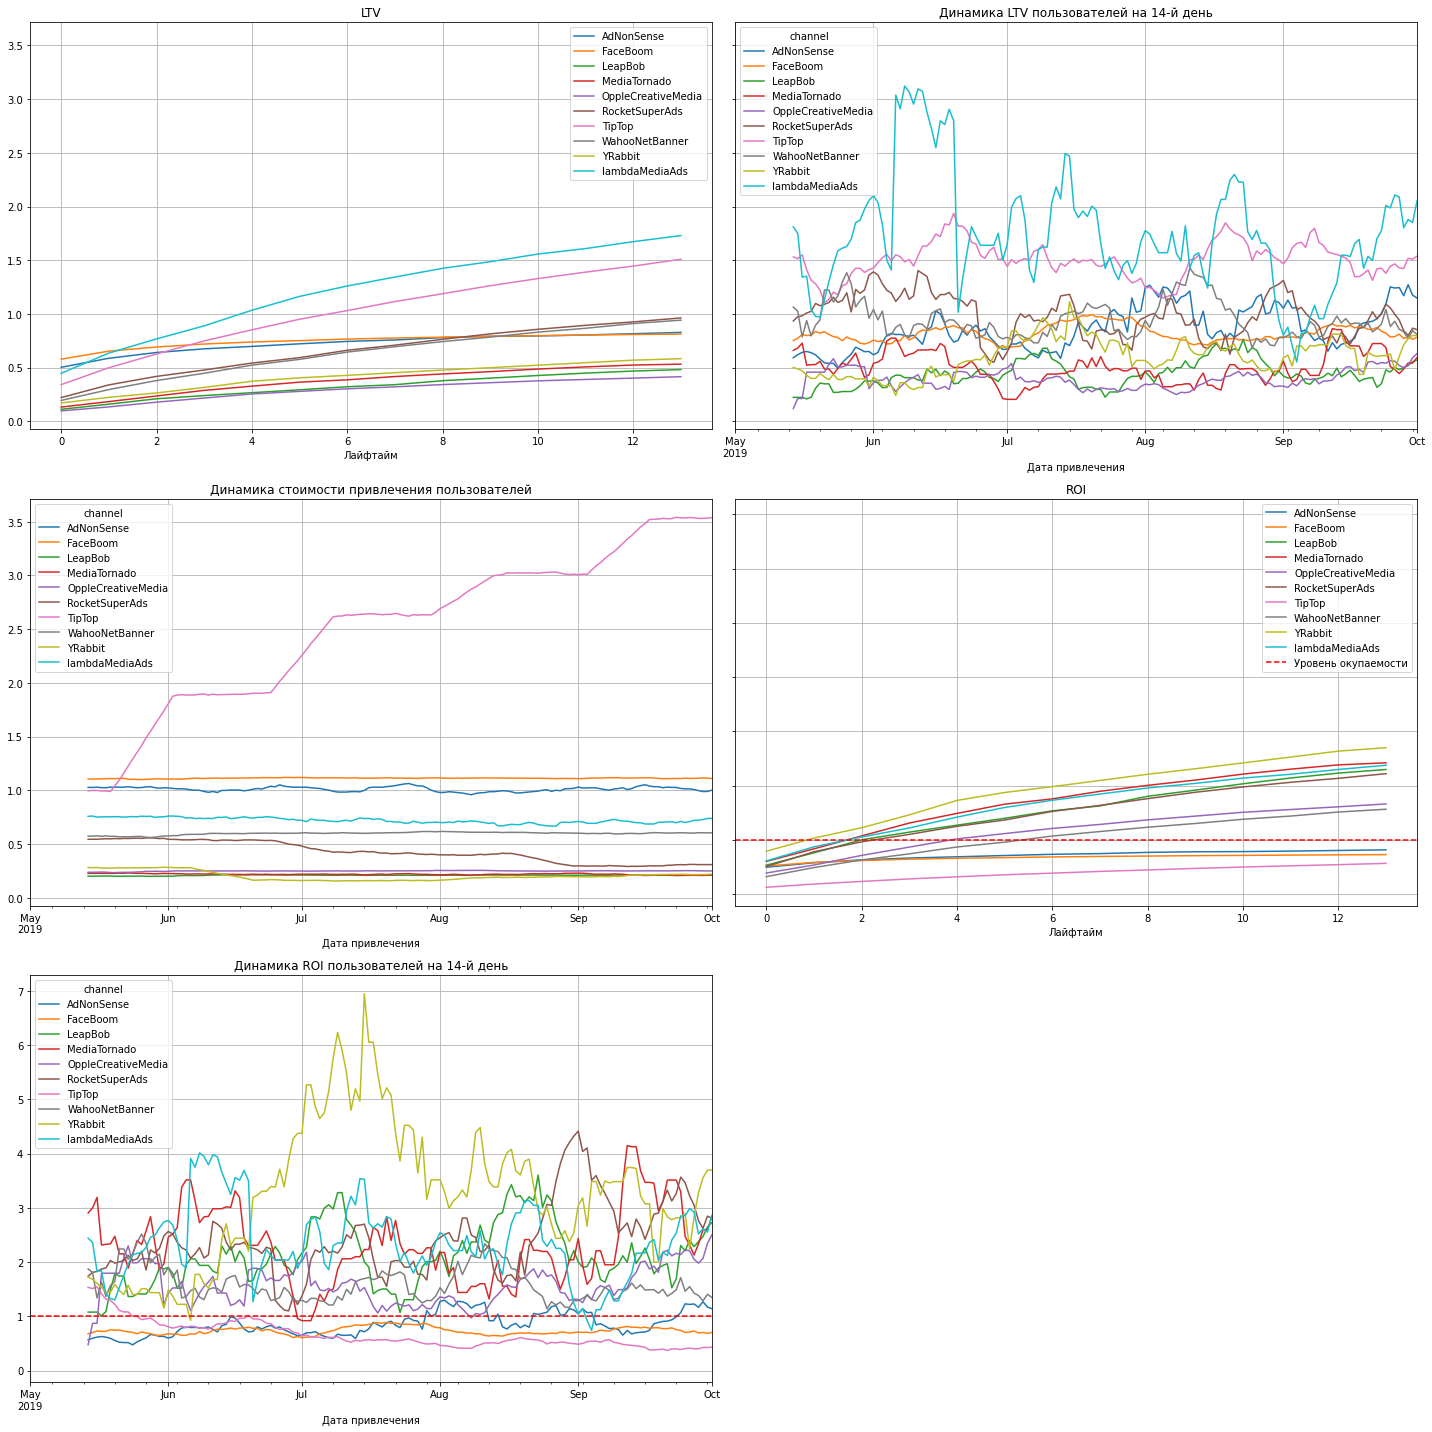

In [32]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

#### Вывод по окупаемости рекламы с разбивкой по рекламным каналам
1. На двухнедельном лайфтайме траты на первую тройку компаний, на которые уходит большая часть бюджета, не окупаюся.
2. Траты на рекламу в TipTop, FaceBoom и AdNonSense не окупаются вообще.
3. На фоне тройки лидеров канал lambdaMediaAds выглядит перспективным.

### Конверсия и удержание 

In [33]:
# Функции для расчета и визуализаци конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [34]:
# Функции для расчета и визуализации удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Конверсия с разбивкой по устройствам

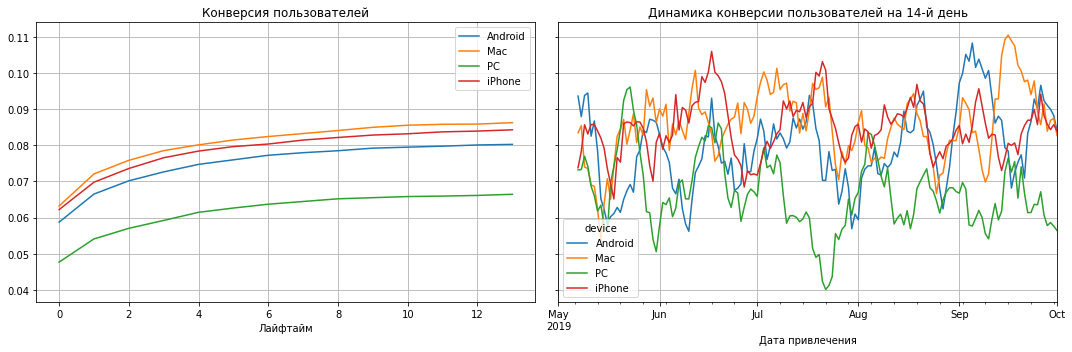

In [35]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Хорошая конверсия у пользователей со всех устройств. Лидируют конверсия пользователи с устройств Apple. Пользователи с PC конверсируются хуже всего.

#### Удержание с разбивкой по устройствам

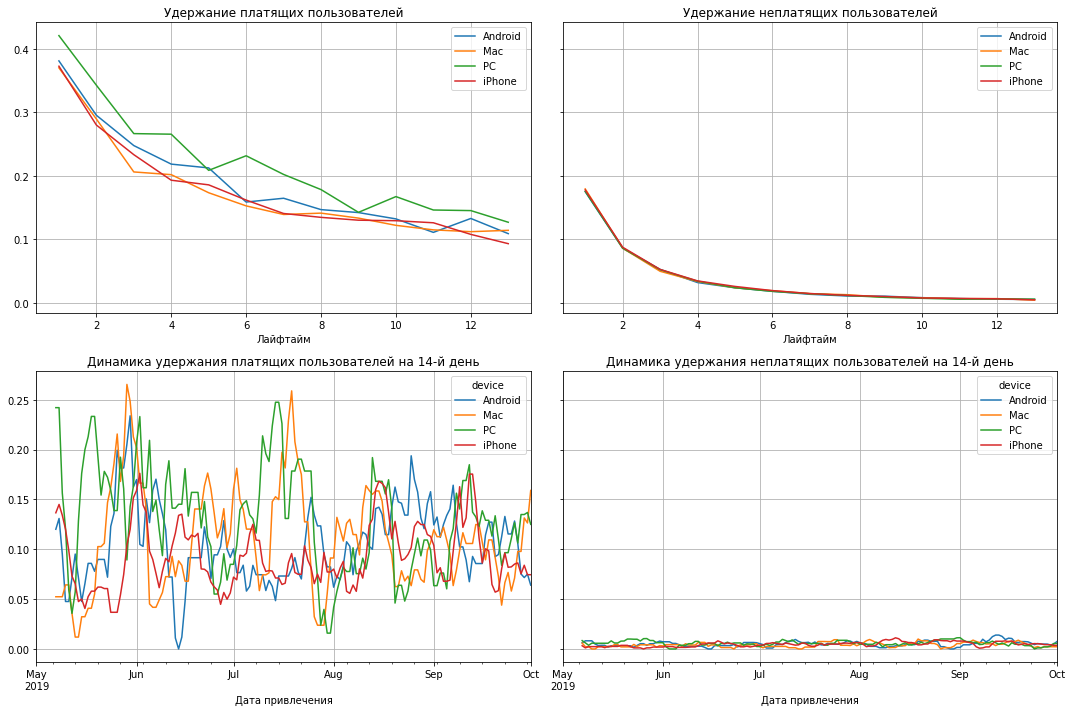

In [36]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержание пользователей по устройствам в целом одинаково. Платящие пользователи с PC удерживаются чуть лучше остальных.

#### Конверсия с разбивкой по странам

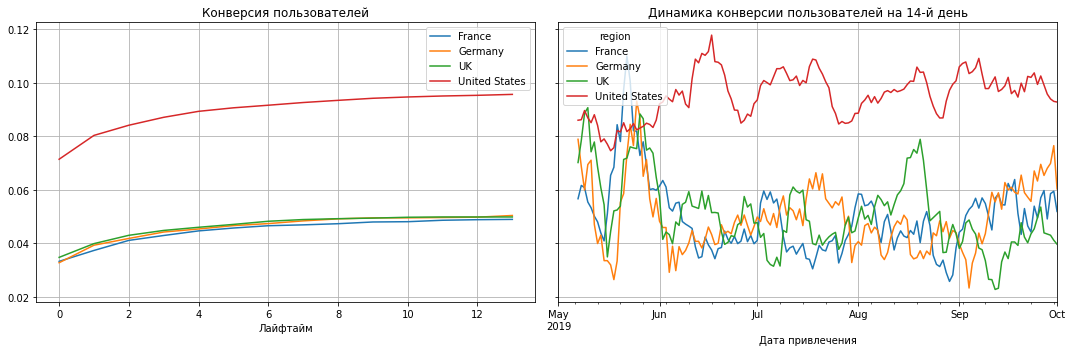

In [37]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия пользователей из США кратно выше пользователей из стран Европы.

#### Удержание с разбивкой по странам

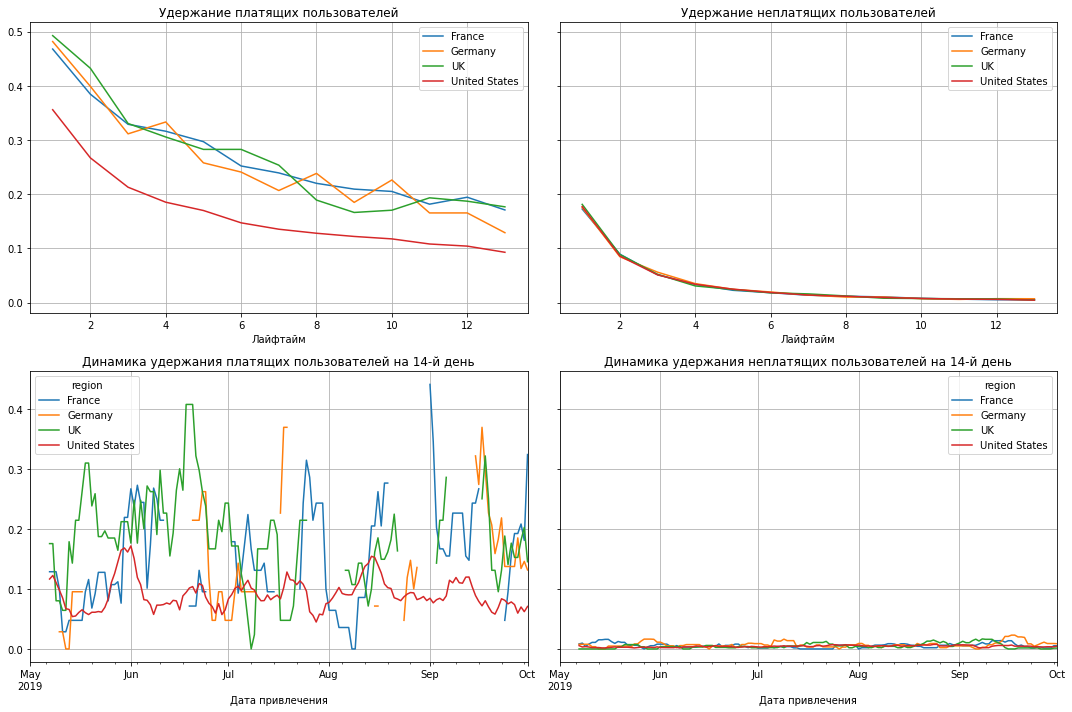

In [38]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

В отличии от конверсии удрежание пользователей из США хуже, чем из регионов Европы.

#### Конверсия с разбивкой по каналам привлечения

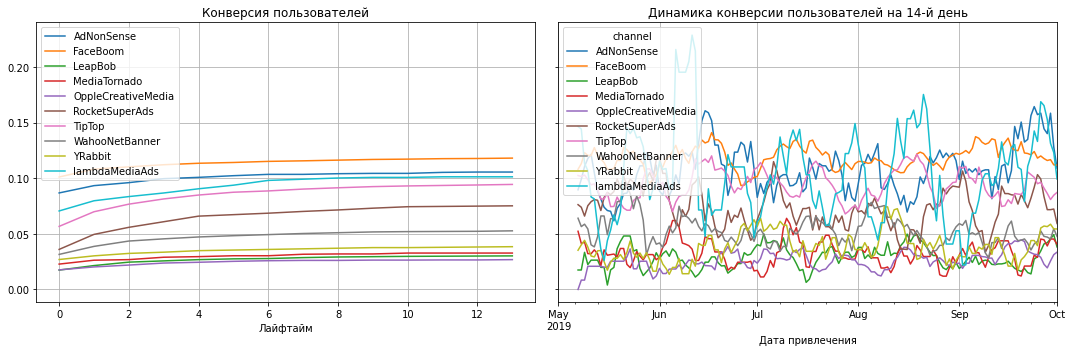

In [39]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Лучше всего конверсия у пользователей привлеченных из FaceBoom.

#### Удержание с разбивкой по каналам привлечения

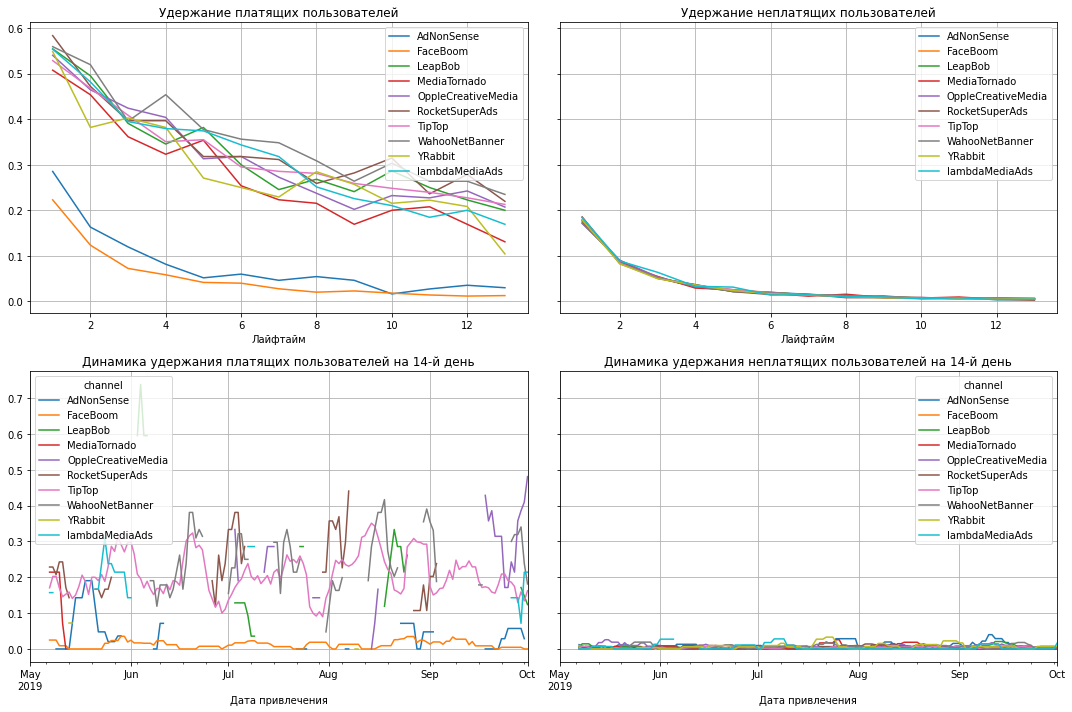

In [40]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержание платящих пользователей хуже всего в FaceBoom и AdNonSense.

### Вывод по оценке окупаемости рекламы
1. В целом реклама не окупается. Это вызвано низкой окупаемость США как основной страны присутствия.
2. Пользователи из США хорошо конверсируются, но есть очень большая проблема с их удержанием.
3. Самые проблемные каналы TipTop и FaceBoom. Оба канала имеют самые выские места по сумме затрат, но совершенно не окупаются.
4. Хуже всего конверсируются польхователи с PC, но при этом имеют хорошее удержание.

## Общий вывод
В процессе исследования:
1. Была изучена общая информация о датафреймах:
    * Во всех таблицах отсутсвуют пропуски.
    * Необходимо привести все названия столбцов в таблицах к единому стилю.
    * Некоторые столбцы имеют неверный тип данных (столбцы с датой имеют тип данных object, вместо datetime).
2. Были предобработаны данных:
    * Названия столбцов были приведены к единому стилю.
    * Были изменены типы данных на корректные.
    * В таблицах нет ни одного пропуска.
3. Был проведен исследовательский анализ:
    * Больше всего не платящих пользователей из США, меньше всего из Германии. Точно так же расположились регионы и количестве платящих пользователей. С точки зрения доли платящих опльзователей лидирует так же США, но в отличии от общего количества пользователей и платящих из них Германия идет после США обходя Францию и Великобританию.
    * Больше всего как платящих, так и не платящих пользователей пользуются iPhone. В то время как меньше всего не платящих пользователей пользуются Mac, а платящих - PC. Лучшую конверсию 3имеют пользователи использующие продукцию Apple (iPhone и Mac).
    * Самый большой приток пользователей происходит через органические каналы. Каналы FaceBoom и TipTop показывают очень неплохие результаты. Также с точки зреняи конверсии хорошие показатели у AdNonSense и lambdaMediaAds.
4. Проведен анализ маркетинга компании:
    * Общая сумма затрат на рекламу - 105497.0.
    * Самые большие расходы на рекламу у TipTop, самые низкие - YRabbit.
    * Сильный рост расходов на рекламу замечен только на TipTop и FaceBoom. По остальным каналам в целом расходы на рекламу не увеличиваются.
    * Дороже всего для компании обходится пользователь, которого привлекли с TipTop, дешевле всего - LeapBob.
5. Оценена окупаемость крекламы, а также конверсии и удержания пользователей:
    * В целом реклама не окупается. Это вызвано низкой окупаемость США как основной страны присутствия.
    * Пользователи из США хорошо конверсируются, но есть очень большая проблема с их удержанием.
    * Самые проблемные каналы TipTop и FaceBoom. Оба канала имеют самые выские места по сумме затрат, но совершенно не окупаются.
    * Хуже всего конверсируются польхователи с PC, но при этом имеют хорошее удержание.

Причины неэффективности привлечения пользователей следующте:
1. Пользователи США перестали окупаться в тот момент, когда САС резко подскочил вверх. Эффекта реклама не произвела, а вот ROI из-за этого резко пошел вниз.
2. Удержание платящие пользователей США очень низкое.
3. Пользователи пришедшие с каналов TipTop и FaceBoom не окупались из-за высоких затрат на реламу.
4. Удержание по каналам FaceBoom и  AdNonSense удерживаются хуже всех остальных.
5. Очень мало внимания уделено пользователям с PC. Пользователи с этой платформы удерживаются лучше всех и окупаются к концу 2 недели.

По итогу выше описианного отделку маркетинга можно сделать следующие рекомендации:
1. Учитывая что подавляющее количество пользователей приходят из США, то необходимо проработать отношения с площадками в этом направлении. Как вариант перенаправить рекламные средства с TipTop и FaceBoom на другие каналы.
2. Обратить больше внимания на европейский рынок.
3. Лучше поработать с органическими пользователями, потому что это существенная доля дохода компании.
4. Стоит обратить больше внимания на пользователей с платформы PC, потому что они удерживаются лучше всех остальных пользователей.
5. Стоит обратить немного больше внимания на пользователей с платформы Androis.
6. Окупаемость рекламы с канала LambdaMediaAds выше всех соатльных. Возможно стоит обратить больше внимания на этотй канал привлечения.
7. Также стоит рассмотреть возможность перераспределения рекламного бюджета с неэффективных каналов на MediaTornado, RocketSuperAds, YRabbit